QUESTION 2:
Use CC_GENERAL.csv given in the folder and apply:
a) Preprocess the data by removing the categorical column and filling the missing values.
b) Apply StandardScaler() and normalize() functions to scale and normalize raw input data.
c) Use PCA with K=2 to reduce the input dimensions to two features.
d) Apply Agglomerative Clustering with k=2,3,4 and 5 on reduced features and visualize result for each k value using scatter plot.
e) Evaluate different variations using Silhouette Scores and Visualize results with a bar chart

In [76]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.style.use('ggplot')

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

#add all lib here 

In [77]:
dataset= pd.read_csv("C:/Users/deepp/OneDrive/Desktop/ML/Assignment_6/CC_GENERAL.CSV") #add data with our machine 

In [78]:
dataset #only print dataset

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [79]:
dataset.isnull().sum() #check dartaset is null or not null with isnull fun.

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [80]:
dataset = dataset.drop("CUST_ID", axis=1) #here we drop cat. data like cust_id

In [81]:
#checking for Null values
dataset.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [82]:
dataset = dataset.fillna(dataset.mean()) #filling null values with mean values

In [83]:
 dataset.isnull().sum() #check again our data is full fill their req..

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [84]:
scaler = StandardScaler()
X_Scale = scaler.fit_transform(dataset)
print(X_Scale) #apply StandardScaler()

[[-0.73198937 -0.24943448 -0.42489974 ... -0.31096755 -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.08931021  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.10166318 -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.33546549  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.34690648  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.33294642 -0.52555097
  -4.12276757]]


In [85]:
d = preprocessing.normalize(X_Scale)
scaled_df = pd.DataFrame(d)
scaled_df.head() #apply normalize() functions

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,-1.841058e-16,-0.220379,0.151244
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400


In [86]:
print(scaled_df) 

            0         1         2         3         4         5         6   \
0    -0.311938 -0.106297 -0.181072 -0.152108 -0.148760 -0.198921 -0.343687   
1     0.219925  0.037539 -0.131222 -0.099749 -0.127037  0.728166 -0.341434   
2     0.126682  0.146783 -0.030504  0.030850 -0.128790 -0.132249  0.359771   
3     0.020589 -0.426439  0.097309  0.229034 -0.190618 -0.154587 -0.425253   
4    -0.151595  0.218909 -0.195238 -0.146744 -0.192075 -0.197234 -0.428504   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -0.146893  0.103128 -0.066344 -0.071050 -0.026403 -0.092916  0.252770   
8946 -0.151521  0.105735 -0.067173 -0.072846 -0.025067 -0.095266  0.259162   
8947 -0.156974 -0.039324 -0.085222 -0.075675 -0.062521 -0.098965  0.181181   
8948 -0.154320 -0.038411 -0.097240 -0.073918 -0.094139 -0.093057 -0.253016   
8949 -0.115207 -0.178881  0.008480  0.060711 -0.091465 -0.081732  0.088393   

            7         8         9         10        11        1

In [87]:
pca=PCA(2)
x_pca = pca.fit_transform(d)
x_pca = pd.DataFrame(x_pca)
x_pca.columns = ['P1','P2'] #Use PCA with K=2 to reduce the input dimensions to two features

In [88]:
x_pca.head() #head function 

,P1,P2
0,-0.489826,-0.679678
1,-0.518791,0.545012
2,0.330885,0.268977
3,-0.482374,-0.092110
4,-0.563289,-0.481915


In [ ]:
#Apply Agglomerative Clustering with k=2,3,4 and 5 on reduced features and visualize result for each k value using scatter plot.

In [89]:
from sklearn.cluster import AgglomerativeClustering 
AC2 = AgglomerativeClustering(2)
a = AC2.fit_predict(x_pca) #Agglomerative Clustering with k=2

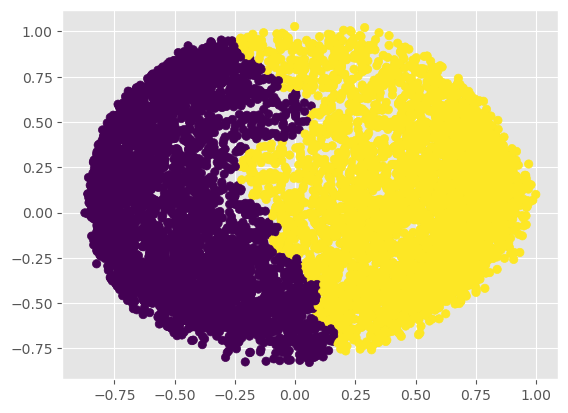

In [90]:
plt.scatter(x_pca['P1'],x_pca['P2'],c=a ,cmap='viridis')
plt.show() #plt.show use for pictorial graph presentation 

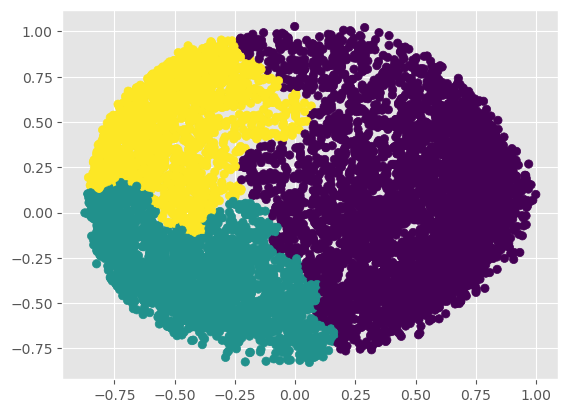

In [102]:
AC3 = AgglomerativeClustering(3)
a = AC3.fit_predict(x_pca)
plt.scatter(x_pca['P1'],x_pca['P2'],c=a ,cmap='viridis')
plt.show()  #Agglomerative Clustering with k=3 and print

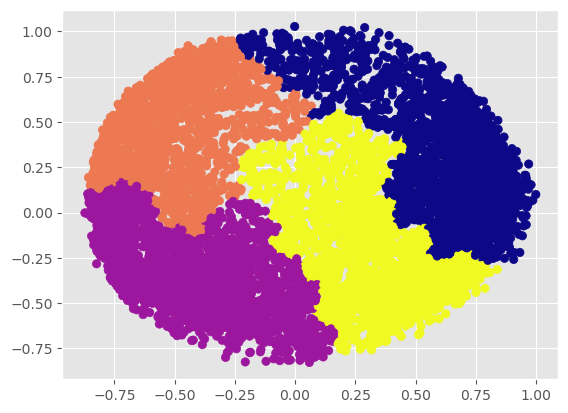

In [103]:
AC4 = AgglomerativeClustering(4)
a = AC4.fit_predict(x_pca)
plt.scatter(x_pca['P1'],x_pca['P2'],c=a ,cmap='plasma')
plt.show()  #Agglomerative Clustering with k=4 and print

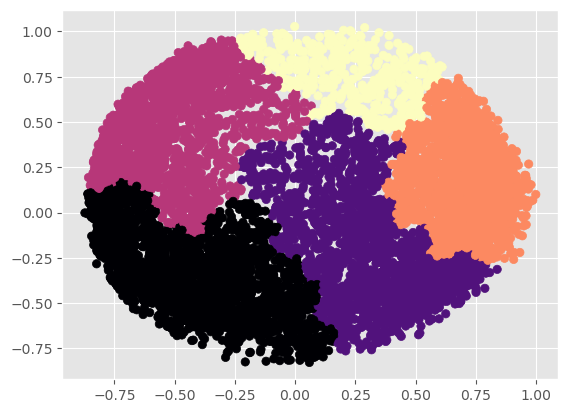

In [104]:
AC5 = AgglomerativeClustering(5)
a = AC5.fit_predict(x_pca)
plt.scatter(x_pca['P1'],x_pca['P2'],c=a ,cmap='magma')
plt.show()  #Agglomerative Clustering with k=5 and print 

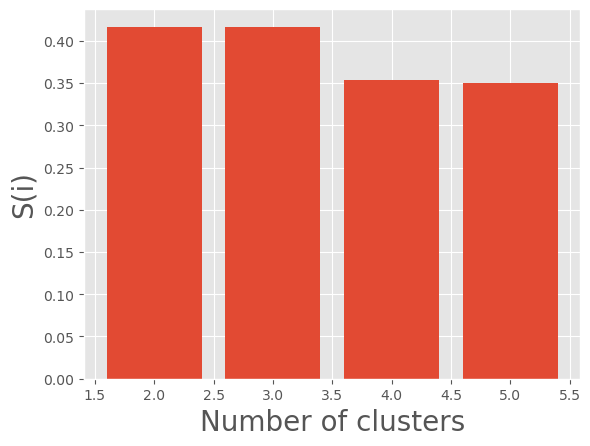

In [110]:

k = [2, 3, 4, 5]

# Appending the silhouette scores of the different models to the list
sss = []
sss.append(silhouette_score(x_pca, AC2.fit_predict(x_pca)))
sss.append(silhouette_score(x_pca, AC3.fit_predict(x_pca)))
sss.append(silhouette_score(x_pca, AC4.fit_predict(x_pca)))
sss.append(silhouette_score(x_pca, AC5.fit_predict(x_pca)))



# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()
#reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html